# Film_Fortune_Telling


### Final Project submission :

1. Student name: Abigael Nyatichi Nyabaga
2. Student pace: Full time
3. Scheduled project review date/time: 22.03.2024
4. Instructor name: Asha Deen, Lucille Kaleha
5. Blog post URL:

## Business problem

 > Business Problem : Microsoft wants to start a film company
 
 Microsoft decides to venture into the world of movie production, but they're new to the game. I have been given a task  to figure out what kinds of movies are popular right now. Your job is to dig into the data and give them advice on what types of movies they should focus on making. With my insights, Microsoft can make smart decisions about their film projects and increase their chances of success in the industry.

In [2]:
#Import libraries and packages
import pandas as pd 
import gzip
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data mining


## Load data :1

In [55]:
df_bom_gross=pd.read_csv("data/bom.movie_gross.csv.gz")
df_bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Load Data: 2

In [29]:
import gzip
df_movie_info = pd.read_csv("data/rt.movie_info.tsv.gz",delimiter='\t', compression='gzip')
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## Load data: 3

In [30]:
df_reviews = pd.read_csv("data/rt.reviews.tsv.gz",delimiter='\t', compression='gzip',encoding='latin1')
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## Load data: 4

In [31]:
df_tmdb_movies =pd.read_csv("data/tmdb.movies.csv.gz", compression='gzip',index_col=0)
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Load data: 5

In [33]:
df_movie_budgets = pd .read_csv("data/tn.movie_budgets.csv.gz")
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Cleaning

##### Lets clean the bom_gross dataframe

In [56]:
# Clean the data :Replace the null values in foreign gross and domestic_grosss columns
# Check 'foreign_gross'column  Before Modification
before_foreign_nulls = df_bom_gross['foreign_gross'].isnull().sum()
before_domestic_nulls = df_bom_gross['domestic_gross'].isnull().sum()

#Replace the null values
df_bom_gross['foreign_gross'].fillna(0, inplace=True)
df_bom_gross['domestic_gross'].fillna(0, inplace=True)

# Check 'foreign_gross'column  After Modification
after_foreign_nulls = df_bom_gross['foreign_gross'].isnull().sum()
after_domestic_nulls = df_bom_gross['domestic_gross'].isnull().sum()

print(before_foreign_nulls)
print(before_domestic_nulls)
print(after_foreign_nulls)
print(after_domestic_nulls)


1350
28
0
0


In [57]:
#show the datatypes in the different columns
print(df_bom_gross.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [58]:
#Change the foreign_gross datatype to float 
# Check the current data type of 'foreign_gross' column before modification
before_dtype = df_bom_gross['foreign_gross'].dtype

# Run the Code
df_bom_gross.replace(',','', regex=True, inplace=True)
df_bom_gross['foreign_gross']=df_bom_gross['foreign_gross'].astype(float)

#check the data type of 'foreign_gross' column after modification
after_dtype = df_bom_gross['foreign_gross'].dtype
after_dtype

#assert the changes made
assert after_dtype == float, "The data type of 'foreign_gross' column was not changed to float."

## Data Analysis

## 1 . Which movie genres are the most popular?

To answer this question, we are trying to find out which movie genres have the highest popularity rating. By identifying the most popular genres, movie studios can make data-driven decisions about which types of movies to produce and market to maximize profits.

In [9]:
import gzip
df_movie_info = pd.read_csv("data/rt.movie_info.tsv.gz",delimiter='\t', compression='gzip')
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [15]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Data interpretation
This data frame contains 1560 rows and 12 columns. The column values include: id , synopsis,rating ,genre, director,writer,theater_date, dvd_date, currency  ,box_office , runtime, studio.  From the data given we can carry out various analysis questions such as:
1. Which movie genre has the highest ratings: here we can use the values from column :id,rating,genre. We can then merge it to another table to get the names of the movies.
2.  we can then look at the run time for the most popular movies by segmenting the top ten movies as grouped by ratings.
3. we can also view the number of movies produced by different studios such as Entertainment one studio

> ** Genre Analysis:**
>1. What are the most common genres? # Drama

In [10]:
# Most common genres
common_genres = df_movie_info['genre'].value_counts().head(5)
print("Most common genres:")
print(common_genres)
print()


Most common genres:
genre
Drama                                151
Comedy                               110
Comedy|Drama                          80
Drama|Mystery and Suspense            67
Art House and International|Drama     62
Name: count, dtype: int64



**The most common genre is: *Drama* With a frequency of 151 counts**

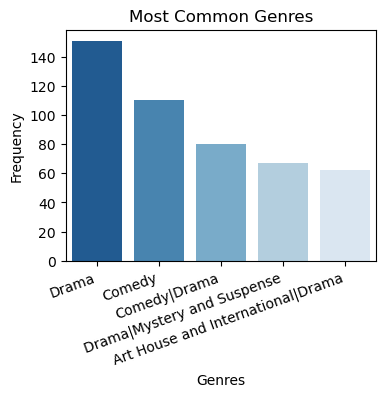

In [67]:
sns.set_style()
plt.figure(figsize=(4, 3))
sns.barplot(x=common_genres.index, y=common_genres.values, palette='Blues_r')
plt.title('Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=20, ha='right')
plt.show()

### Analysis result
The genre with the highest frequency is drama which shows that most people prefer to watch movies under this genre.
> Having seen this trend , I would advice Microsoft to focus on producing more comedy,drama movies.

# 2. Movie Runtime Analysis:
What is the distribution of movie runtimes?
   - find the mode runtime.
> plot a histogram to show 

In [13]:
# Calculate the mode of the runtime
mode_runtime = df_movie_info['runtime'].mode()

print("Mode of the runtime:", mode_runtime)

Mode of the runtime: 0    90 minutes
Name: runtime, dtype: object


In [14]:
# Check the frequency of the mode(s)
mode_frequency = df_movie_info['runtime'].value_counts().loc[mode_runtime]
print("Frequency of the mode runtime(s):")
print(mode_frequency)

Frequency of the mode runtime(s):
runtime
90 minutes    72
Name: count, dtype: int64


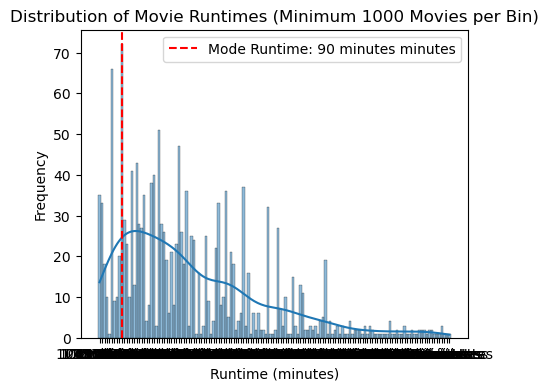

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mode of the runtime
mode_runtime = df_movie_info['runtime'].mode()[0]

# Set the minimum number of movies per bin
min_bin_count = 1000

# Calculate the number of bins based on the minimum count
n_bins = int(len(df_movie_info) / min_bin_count)

# Plot the histogram with seaborn
plt.figure(figsize=(5, 4))
sns.histplot(df_movie_info['runtime'], bins=n_bins, kde=True)
plt.title('Distribution of Movie Runtimes (Minimum 1000 Movies per Bin)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

# Add a vertical line for the mode
plt.axvline(x=mode_runtime, color='red', linestyle='--', label=f'Mode Runtime: {mode_runtime} minutes')

plt.legend()
plt.show()


### Analysis result
The mode runtime is 90 minutes and the frequency of movies within a sample of the data that have a runtime of 90 minutes in 72 movies.
- This analysis shows that most people love watching movies that have a runtime of 90 minutes.
- The graph is also skewed to the right. This shows that as the runtime increases the frequency of the movies decreases. This shows that, people generaly prefer movies with lesser runtime. 

### 3. Movie with highest reviews

In [16]:
df_reviews = pd.read_csv("data/rt.reviews.tsv.gz",delimiter='\t', compression='gzip',encoding='latin1')
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [17]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Data interpretation
The dataframe has 54432 rows and 8 columns.The column values include:id, review, fresh, critic, top_critic, publisher, date.The data types of the values include : int and object.
> The analysis that can be done on this is which movie has the highest reviews 

In [18]:
# Group by 'id' and sum up the number of reviews for each movie
reviews_count = df_reviews.groupby('id')['review'].count()

# Find the movie with the highest number of reviews
highest_reviews_movie_id = reviews_count.idxmax()
highest_reviews_count = reviews_count.max()

print("Movie with the highest number of reviews:")
print("Movie ID:", highest_reviews_movie_id)
print("Number of Reviews:", highest_reviews_count)

Movie with the highest number of reviews:
Movie ID: 782
Number of Reviews: 338


### Analysis result
The movie with the highest reviews is movie ID. A critical analysis of data by going over the reviews content can help in getting a feedback from the audience and can help improve on meeting the needs of the audience. Analyzing the data from the df_reviews DataFrame can provide valuable insights into critical and audience reception, inform strategic decision-making, and guide the studio's efforts to produce high-quality, successful movies.

## 5. How production budget affects the returns of the movie?

In [24]:
df_movie_budgets = pd .read_csv("data/tn.movie_budgets.csv.gz")
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [25]:
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data interpretation
The data frame has 5782 rows and 6 columns.The columns contain values of id,release_date, movie, production_budget, domestic_gross, worldwide_gross. The type of analysis thatcan be done on this include:

1. Relationship between production budget and both domestic gross profit and world wide gross profit.


To analyze how the **production budget affects the returns of a movie**, we can calculate the return on investment (ROI) using the data from the provided CSV file. The return on investment can be calculated as follow
                           **ROI =((Worldwide Gross−Production Budget)/Production Budget)*100 **

We'll then visualize the relationship between the production budget and ROI. Here's how you can do it in Python using pandas and matplotlib:

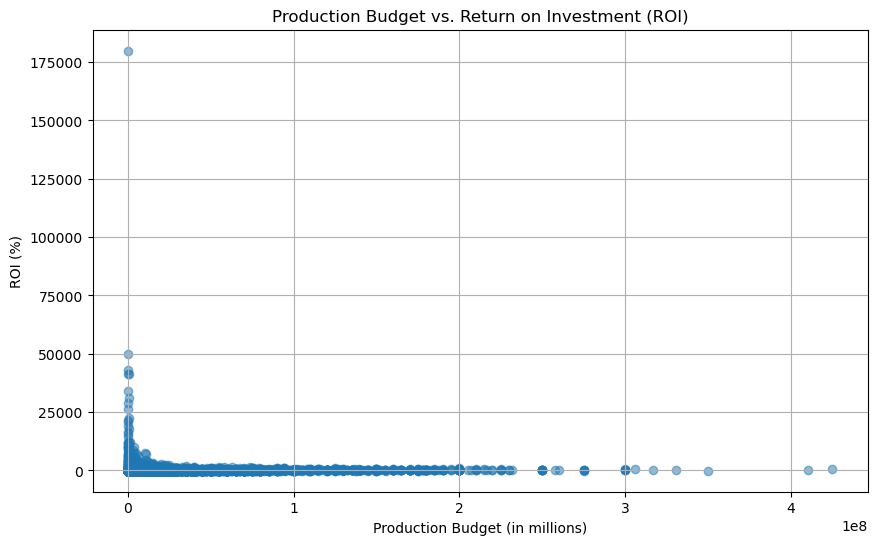

In [79]:
# Convert 'production_budget' and 'worldwide_gross' columns to numeric
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate ROI
df_movie_budgets['ROI'] = ((df_movie_budgets['worldwide_gross'] - df_movie_budgets['production_budget']) / df_movie_budgets['production_budget']) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_movie_budgets['production_budget'], df_movie_budgets['ROI'], alpha=0.5)
plt.title('Production Budget vs. Return on Investment (ROI)')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('ROI (%)')
plt.grid(True)
plt.show()




In [75]:
import pandas as pd

# Read the data
df_movie_budgets = pd.read_csv("data/tn.movie_budgets.csv.gz")

# Convert 'production_budget' and 'worldwide_gross' columns to numeric
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate ROI
df_movie_budgets['ROI'] = ((df_movie_budgets['worldwide_gross'] - df_movie_budgets['production_budget']) / df_movie_budgets['production_budget']) * 100

# Calculate the correlation coefficient
correlation = df_movie_budgets['production_budget'].corr(df_movie_budgets['ROI'])

print("Correlation coefficient between ROI and Production Budget:", correlation)


Correlation coefficient between ROI and Production Budget: -0.04871481362951165


## Analysis report
The correlation coefficient between ROI and Production Budget being approximately -0.048 suggests a very weak negative correlation between the two variables. In other words, changes in production budget do not significantly predict changes in ROI.Overall, while the correlation coefficient indicates a weak negative correlation between ROI and production budget, it's crucial for movie studios to conduct comprehensive analyses considering various factors to make informed decisions regarding budget allocation and maximizing returns.

Find the correlation of ROI and World wide gross

In [74]:
# Convert 'production_budget' and 'worldwide_gross' columns to numeric
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the correlation coefficient
correlation = df_movie_budgets['production_budget'].corr(df_movie_budgets['worldwide_gross'])

print("Correlation between Production Budget and Worldwide Gross Revenue (rp):", correlation)


Correlation between Production Budget and Worldwide Gross Revenue (rp): 0.7483059765694747


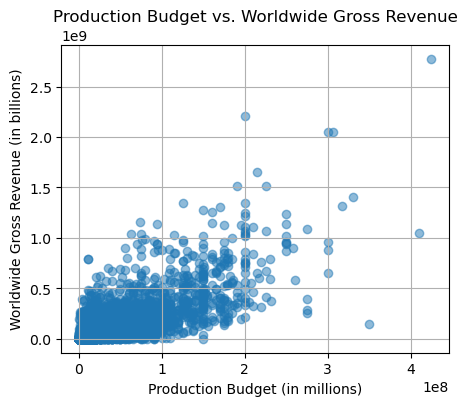

In [80]:
# Convert 'production_budget' and 'worldwide_gross' columns to numeric
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Plotting
plt.figure(figsize=(5, 4))
plt.scatter(df_movie_budgets['production_budget'], df_movie_budgets['worldwide_gross'], alpha=0.5)
plt.title('Production Budget vs. Worldwide Gross Revenue')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Worldwide Gross Revenue (in billions)')
plt.grid(True)
plt.show()

Understanding the correlation helps studios allocate their budgets more effectively. If there's a strong positive correlation between production budget and worldwide gross revenue, investing more in production may lead to higher returns. There seems to be a very strong corelation between Production budget and Worldwide Gross Revenue. I would advice Microsoft to invest more on their production budget.